In [5]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
import os,sys
import h5py, json
import pickle as pkl
import time

import nept
sys.path.append('../PreProcessing/')
sys.path.append('../TrackingAnalyses/')
sys.path.append('../Lib/')
sys.path.append('../Analyses/')

from importlib import reload  # Python 3.4+ only.
import pre_process_neuralynx as PPN
import TreeMazeFunctions as TMF
import spike_functions as SF
import spatial_tuning as ST
import stats_functions as StatsF
import plot_functions as PF
import zone_analyses_session as ZA
import analyses_table as AT

In [6]:
oakPaths = AT.getOakPaths()

In [3]:
# ZA=reload(ZA)
# SF=reload(SF)
# TMF=reload(TMF)
# task = 'T3g'
# overwrite=1

# animals = ['Cl']
# #allDat = {}

# for animal in animals:
#     CT_Path =  oakPaths['Clustered'] / animal / (animal+'_ClusteringSummary.json')
#     ZoneDat_Fn = oakPaths['Analyses'] / animal / ('{}_{}_ZoneAnalysesDat.pkl').format(animal,task)
#     plotSP = oakPaths['Analyses'] / animal / 'Plots'

#     with CT_Path.open() as f:
#         CT = json.load(f)

#     SessionList = []
#     SessionPaths = {}
#     ZoneDat = {}
#     cnt=0
#     if (not ZoneDat_Fn.exists()) | overwrite:
#         for se,v in CT['Sessions'].items():
#             if v:
#                 temp = se.split('_')
#                 if temp[1]==task:
#                     try:
#                         SessionList.append(se)
#                         SessionPaths[se]=ZA.getSessionPaths(oakPaths,se)
#                         ZoneDat[se]=ZA.zone_analyses(se,overwriteSpikes=overwrite,doPlots=0)
#                         #ZoneDat[se]=ZA.zone_analyses(se,overwrite=0,doPlots=1)
#                     except:
#                         print("Error processing session: {}".format(se))
#                         print ("Error", sys.exc_info()[0],sys.exc_info()[1],sys.exc_info()[2].tb_lineno)
#                     cnt+=1

#         ZoneDat['Sessions'] = SessionList
#         ZoneDat['SessionPaths'] = SessionPaths

#         with ZoneDat_Fn.open(mode='wb') as f:
#             pkl.dump(ZoneDat,f,pkl.HIGHEST_PROTOCOL)

#     else:
#         with ZoneDat_Fn.open(mode='rb') as f:
#             ZoneDat = pkl.load(f)
#     #allDat[animal] = ZoneDat

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [17]:
ZA=reload(ZA)
SF=reload(SF)
TMF=reload(TMF)
task = 'T3g'
overwrite=0

animals = ['Li','Cl','Ne']
allDat = {}
    
for an in animals:
    
    fn = oakPaths['Root'] / (an+'_SessionPaths.pkl')
    with fn.open(mode="rb") as f:
        sePaths = pkl.load(f)

    CT_Path =  oakPaths['Clustered'] / an / (an+'_ClusteringSummary.json')
    ZoneDat_Fn = oakPaths['Analyses'] / an / ('{}_{}_ZoneAnalysesDat.pkl').format(an,task)
    #plotSP = oakPaths['Analyses'] / animal / 'Plots'

    with CT_Path.open() as f:
        CT = json.load(f)
        
    SessionList = []
    SessionPaths = {}
    ZoneDat = {}
    cnt=0
    if (not ZoneDat_Fn.exists()) | overwrite:
        for se,v in CT['Sessions'].items():
            if v:
                temp = se.split('_')
                if temp[1]==task:
                    try:
                        SessionList.append(se)
                        #ZoneDat[se]=ZA.zone_analyses(sePaths[se],overwriteSpikes=overwrite,doPlots=0)
                        ZoneDat[se]=ZA.zone_analyses(sePaths[se],overwritePos=overwrite,doPlots=0)
                    
                    except:
                        pass
                    #    print("Error processing session: {}".format(se))
                    #    print ("Error", sys.exc_info()[0],sys.exc_info()[1],sys.exc_info()[2].tb_lineno)
                    cnt+=1

        ZoneDat['Sessions'] = SessionList
        ZoneDat['SessionPaths'] = SessionPaths

        with ZoneDat_Fn.open(mode='wb') as f:
            pkl.dump(ZoneDat,f,pkl.HIGHEST_PROTOCOL)

    else:
        with ZoneDat_Fn.open(mode='rb') as f:
            ZoneDat = pkl.load(f)
    allDat[an] = ZoneDat

In [10]:
# with CT_Path.open() as f:
#     CT = json.load(f)
ZoneDat.keys()

dict_keys(['Ne_T3g_052918', 'Ne_T3g_053018', 'Ne_T3g_053118', 'Ne_T3g_060118', 'Ne_T3g_060418', 'Ne_T3g_061218', 'Ne_T3g_061518', 'Ne_T3g_061818', 'Ne_T3g_062018', 'Ne_T3g_062518', 'Ne_T3g_062618', 'Ne_T3g_062918', 'Ne_T3g_070518', 'Ne_T3g_070618', 'Ne_T3g_070918', 'Ne_T3g_071018', 'Ne_T3g_071118', 'Ne_T3g_072518', 'Ne_T3g_072618', 'Ne_T3g_073018', 'Ne_T3g_080118', 'Ne_T3g_080318'])

In [19]:
SessionList

[]

In [522]:
se = 'Li_T3g_062718'
ZoneDat[se]=ZA.zone_analyses(se,overwrite=1,doPlots=1)


Starting Analyses for Sesssion Li_T3g_062718
Starting Zone Analyses.
Computing Position Data.
Smoothing track data completed: 24.73 s 
Resampling the Data to 0.02 seconds completed: 0.02 s 
Converting Track x,y to TreeMaze Positions Completed: 10.24 s
Creating Position Matrix Completed : 10.27 s
Creating Segment Direction Matrix Complete: 8.58 s
Processing of Position Data Complete : 43.60 s
Computing Event Data.
Behavioral Tracking Variables Computed and Saved.
Loading Spikes...
Binned Spike Files Loaded.
Loading FRs ...
FR Loaded.


../Analyses/stats_functions.py:17: RuntimeWarning: divide by zero encountered in log2
  InfoMat = fr_map*loc_prob*np.log2(fr_map/meanFR)


Zone Analyses Completed



In [15]:
plotSP = oakPaths['Analyses'] / animal / 'Plots'
plotSP.mkdir(parents=True, exist_ok=True)


In [22]:
se = list(ZoneDat.keys()) [0]
ZonePairStr =ZoneDat[se]['ZonePairs_Str']


In [24]:
allDat['Li'].

{'Li_T3g_052818': {'Zones': ['Home',
   'SegA',
   'Center',
   'SegB',
   'I1',
   'SegC',
   'G1',
   'SegD',
   'G2',
   'SegE',
   'I2',
   'SegF',
   'G3',
   'SegG',
   'G4'],
  'Partitions': ['All', 'H1', 'H2', 'CL', 'CR', 'CO', 'In', 'Out'],
  'InfoFields': ['counts', 'time', 'prob'],
  'ZonePairs': [('H1', 'H2'),
   ('CL', 'CR'),
   ('CL', 'CO'),
   ('CR', 'CO'),
   ('In', 'Out')],
  'ZonePairs_Str': ['H1-H2', 'CL-CR', 'CL-CO', 'CR-CO', 'In-Out'],
  'ZoneInfo': {'All':                 Home         SegA        Center         SegB          I1  \
   counts  27651.000000  6691.000000  10713.000000  2657.000000  1270.00000   
   time      553.020000   133.820000    214.260000    53.140000    25.40000   
   prob        0.362726     0.087773      0.140533     0.034855     0.01666   
   
                  SegC          G1         SegD           G2         SegE  \
   counts  1442.000000  3794.00000  1612.000000  5237.000000  2273.000000   
   time      28.840000    75.88000    32.24000

In [92]:
se = list(ZoneDat.keys()) [0]
ZonePairStr =ZoneDat[se]['ZonePairs_Str']
nPairs = len(ZonePairStr)
FRxZoneCorr=pd.DataFrame(np.zeros((0,nPairs)))
FRxZoneCorr.columns=ZonePairStr

UnitInfoFields = ['an','se','seNum','Unit','HalfCorr','HalfnRMSE','Si']
UnitInfo=pd.DataFrame(np.zeros((0,len(UnitInfoFields))))
UnitInfo.columns=UnitInfoFields

seCnt =0
unitCnt = 0
cellCnt=0
muaCnt=0
seV = []
seNumV = []
anV = []

uTypeV = []
siV =[]
halfCorrV =[]
halfnRMSEV = []
zcV =[]

pairsV=[]
unitIDV = []
for an in animals:
    for se,dat in allDat[an].items():
        if se[:2]==an:
            CellCorr = dat['FR_CorrZonePairs']['Cells']
            nSeCells = CellCorr.shape[0]
            MuaCorr = dat['FR_CorrZonePairs']['Mua']
            nSeMua = MuaCorr.shape[0]
            nSeUnits = nSeCells+nSeMua

            seV+=[se]*nPairs*nSeUnits
            seNumV+=[seCnt]*nSeUnits*nPairs
            anV +=[an]*nSeUnits*nPairs

            FRxZoneCorr=FRxZoneCorr.append(CellCorr)
            FRxZoneCorr=FRxZoneCorr.append(MuaCorr)
            zcV+=np.array(CellCorr).flatten().tolist()
            zcV+=np.array(MuaCorr).flatten().tolist()

            uTypeV+=['cell']*nSeCells*nPairs
            uTypeV+=['mua']*nSeMua*nPairs

            unitIDV+= (np.repeat(np.arange(nSeUnits),nPairs)+unitCnt).tolist()
            halfCorrV+=np.repeat(dat['ZoneStability']['Cells']['HalfCorr'],nPairs).tolist()
            halfCorrV+=np.repeat(dat['ZoneStability']['Mua']['HalfCorr'],nPairs).tolist()

            halfnRMSEV+=np.repeat(dat['ZoneStability']['Cells']['HalfnRMSE'],nPairs).tolist()
            halfnRMSEV+=np.repeat(dat['ZoneStability']['Mua']['HalfnRMSE'],nPairs).tolist()

            siV+=np.repeat(dat['SI_Zone']['Cells']['All'],nPairs).tolist()
            siV+=np.repeat(dat['SI_Zone']['Mua']['All'],nPairs).tolist()

            pairsV+=ZonePairStr*nSeUnits
            seCnt+=1
            unitCnt+=nSeUnits
            cellCnt+=nSeCells
            muaCnt+=nSeMua

FRxZoneCorr.reset_index(drop=True)

UnitInfoFields = ['zc','zcf','an','se','seNum','uType','unitID','halfCorr','halfnRMSE','SI','zcPairs']
UnitInfo=pd.DataFrame(np.zeros((0,len(UnitInfoFields))))
UnitInfo.columns=UnitInfoFields

UnitInfo['zc'] =zcV
UnitInfo['zcf'] = np.arctanh(zcV)
UnitInfo['zcf'][np.abs(UnitInfo['zcf'])==np.inf]=np.nan

UnitInfo['an'] =anV
UnitInfo['se'] =seV
UnitInfo['seNum']=seNumV
UnitInfo['uType'] = uTypeV
UnitInfo['unitID'] = unitIDV
UnitInfo['halfCorr'] = halfCorrV
UnitInfo['halfnRMSE'] = halfnRMSEV
UnitInfo['SI'] = siV
UnitInfo['zcPairs'] = pairsV

StabUnitInfo = UnitInfo.loc[np.logical_and(UnitInfo['halfCorr']>0.5,~np.isnan(UnitInfo['zcf']))]
#FRCorrZPairs = pd.DataFrame((np.zeros(0,6)))
#list(ZoneDat[se].keys())
#ZoneDat[se]['FR_CorrZonePairs']['Cells']
#x=pd.DataFrame(np.zeros((0,5)))

,zc,zcf,an,se,seNum,uType,unitID,halfCorr,halfnRMSE,SI,zcPairs
0,0.600000,0.693147,Li,Li_T3g_052818,0,cell,0,0.600000,1.008505,-0.219460,H1-H2
1,0.238095,0.242754,Li,Li_T3g_052818,0,cell,0,0.600000,1.008505,-0.219460,CL-CR
2,0.352381,0.368160,Li,Li_T3g_052818,0,cell,0,0.600000,1.008505,-0.219460,CL-CO
3,0.161905,0.163342,Li,Li_T3g_052818,0,cell,0,0.600000,1.008505,-0.219460,CR-CO
4,0.523810,0.581575,Li,Li_T3g_052818,0,cell,0,0.600000,1.008505,-0.219460,In-Out
5,0.333333,0.346574,Li,Li_T3g_052818,0,cell,1,0.333333,0.019181,-0.011014,H1-H2
6,0.276190,0.283553,Li,Li_T3g_052818,0,cell,1,0.333333,0.019181,-0.011014,CL-CR
7,-0.066667,-0.066766,Li,Li_T3g_052818,0,cell,1,0.333333,0.019181,-0.011014,CL-CO
8,-0.447619,-0.481719,Li,Li_T3g_052818,0,cell,1,0.333333,0.019181,-0.011014,CR-CO
9,-0.333333,-0.346574,Li,Li_T3g_052818,0,cell,1,0.333333,0.019181,-0.011014,In-Out


In [91]:
np.repeat(np.arange(nSeUnits),nPairs)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7])

In [93]:
UnitInfo['unitID'].value_counts()

939    5
289    5
337    5
333    5
329    5
325    5
321    5
317    5
313    5
309    5
305    5
301    5
297    5
293    5
285    5
229    5
281    5
277    5
273    5
269    5
265    5
261    5
257    5
253    5
249    5
245    5
241    5
237    5
341    5
345    5
      ..
578    5
586    5
694    5
590    5
690    5
686    5
682    5
678    5
674    5
670    5
666    5
662    5
658    5
654    5
650    5
646    5
642    5
638    5
634    5
630    5
626    5
622    5
618    5
614    5
610    5
606    5
602    5
598    5
594    5
0      5
Name: unitID, Length: 941, dtype: int64

In [94]:
UnitInfo[UnitInfo['unitID']==240]

,zc,zcf,an,se,seNum,uType,unitID,halfCorr,halfnRMSE,SI,zcPairs
1200,0.695238,0.858024,Li,Li_T3g_062718,12,cell,240,0.695238,0.238403,-0.050794,H1-H2
1201,0.593308,0.682756,Li,Li_T3g_062718,12,cell,240,0.695238,0.238403,-0.050794,CL-CR
1202,0.200000,0.202733,Li,Li_T3g_062718,12,cell,240,0.695238,0.238403,-0.050794,CL-CO
1203,0.287085,0.295386,Li,Li_T3g_062718,12,cell,240,0.695238,0.238403,-0.050794,CR-CO
1204,-0.238095,-0.242754,Li,Li_T3g_062718,12,cell,240,0.695238,0.238403,-0.050794,In-Out


In [46]:
def zCorrPairBoxPlot(dat,ax):
   
    with sns.axes_style('whitegrid'):
        ax=sns.boxplot(x='zcPairs',y='zc',hue='uType',data=dat,ax=ax,color='lightgrey')
        ax.get_legend().remove()
        ax=sns.stripplot(x='zcPairs',y='zc',hue='uType',palette="Set2",data=dat,ax=ax,dodge=True,alpha=0.6)
        ax.set_ylim([-1.1,1.1])
        sns.despine(offset=10, trim=False,ax=ax)
        for tick in ax.get_xticklabels():
            tick.set_rotation(45)
        ax.grid(axis='both',color='grey',alpha=0.4)
        ax.set_ylabel(' Kendalls τ ')
        ax.set_xlabel(' Data Pairings ')
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles[2:], labels[:2])


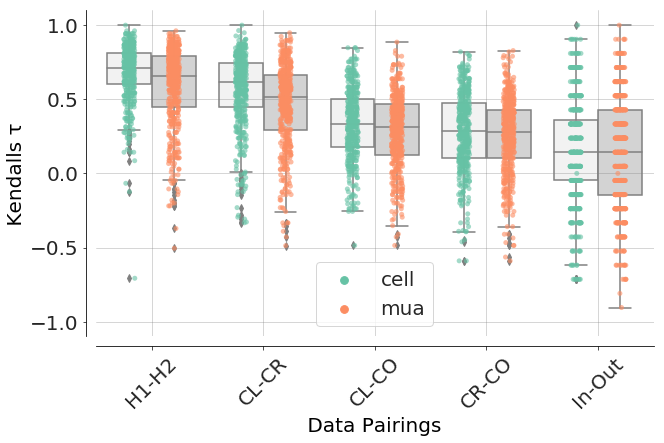

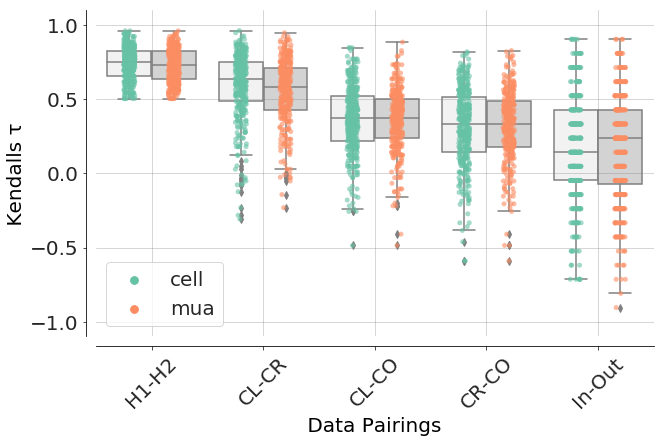

In [48]:
f,ax = plt.subplots(figsize=(10,6))
zCorrPairBoxPlot(UnitInfo,ax)
#f.savefig(plotSP / 'all_units_ZoneDatCorr.pdf', bbox_inches='tight',pad_inches=0.2)
f,ax = plt.subplots(figsize=(10,6))
zCorrPairBoxPlot(StabUnitInfo,ax)
#f.savefig(plotSP / 'stab_units_ZoneDatCorr.pdf', bbox_inches='tight',pad_inches=0.2)

pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04



Text(0.5, 25.5, ' Data Pairings ')

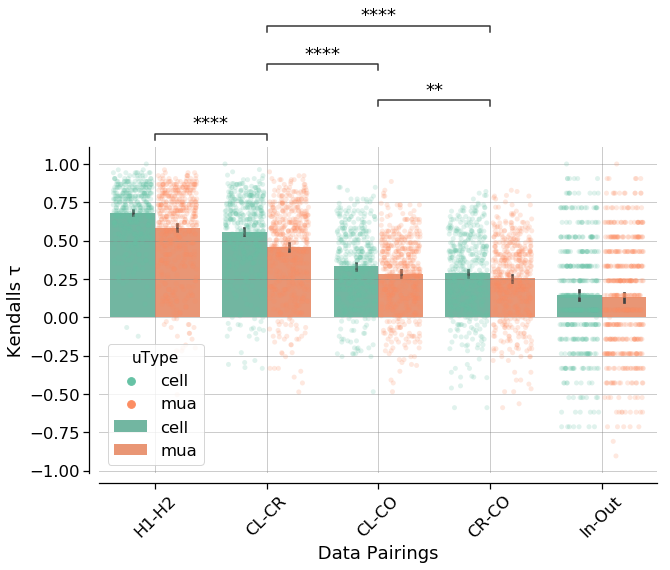

In [110]:
PF=reload(PF)
f,ax = plt.subplots(figsize=(10,6))
dat = UnitInfo
#sns.set()
sns.set_context("notebook", font_scale=1.5)
sns.axes_style('whitegrid')
#sns.catplot(x='zcPairs',y='zc',hue='uType',data=dat,kind='bar',palette="Set2",ax=ax)
ax=sns.stripplot(x='zcPairs',y='zc',hue='uType',data=dat,dodge=True,alpha=0.2,jitter=0.35,palette="Set2",ax=ax)
ax=sns.barplot(x='zcPairs',y='zc',hue='uType',data=dat,palette="Set2",ax=ax)
PF.add_stat_annotation(ax, data=dat,x='zcPairs',y='zc',
                boxPairList=[("H1-H2","CL-CR"), ("CL-CO","CR-CO"),("CL-CR","CL-CO"), ("CL-CR","CR-CO"),],
                    test='Mann-Whitney', textFormat='star', loc='outside', verbose=1,lineYOffsetToBoxAxesCoord=0.1, lineYOffsetAxesCoord=0.02,
                    lineHeightAxesCoord=0.02, textYOffsetPoints=1,  useFixedOffset=True)
ax.grid()
sns.despine(offset=10, trim=False,ax=ax)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.grid(axis='both',color='grey',alpha=0.4)
ax.set_ylabel(' Kendalls τ ')
ax.set_xlabel(' Data Pairings ')
#f.savefig(plotSP / 'all_units_ZoneDatCorrBox.pdf', bbox_inches='tight',pad_inches=0.2)

In [105]:
means=UnitInfo.groupby(['uType','zcPairs']).mean()
means= means.reset_index()

sigma=UnitInfo.groupby(['uType','zcPairs']).ci()
sigma.reset_index()


AttributeError: 'DataFrameGroupBy' object has no attribute 'ci'

pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04



Text(0.5, 25.5, ' Data Pairings ')

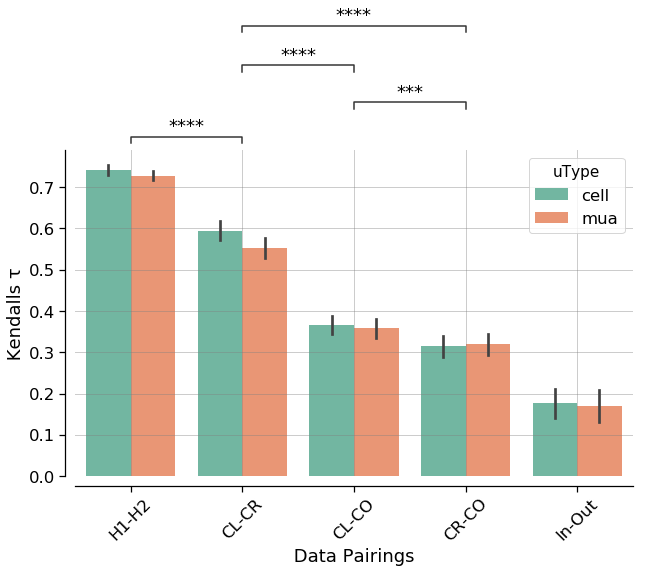

In [50]:
PF=reload(PF)
f,ax = plt.subplots(figsize=(10,6))
dat = StabUnitInfo
#sns.set()
sns.set_context("notebook", font_scale=1.5)
sns.axes_style('whitegrid')
#sns.catplot(x='zcPairs',y='zc',hue='uType',data=dat,kind='bar',palette="Set2",ax=ax)
ax=sns.barplot(x='zcPairs',y='zc',hue='uType',data=dat,palette="Set2",ax=ax)
PF.add_stat_annotation(ax, data=dat,x='zcPairs',y='zc',
                boxPairList=[("H1-H2","CL-CR"), ("CL-CO","CR-CO"),("CL-CR","CL-CO"), ("CL-CR","CR-CO"),],
                    test='Mann-Whitney', textFormat='star', loc='outside', verbose=1,lineYOffsetToBoxAxesCoord=0.1, lineYOffsetAxesCoord=0.02,
                    lineHeightAxesCoord=0.02, textYOffsetPoints=1,  useFixedOffset=True)
ax.grid()
sns.despine(offset=10, trim=False,ax=ax)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.grid(axis='both',color='grey',alpha=0.4)
ax.set_ylabel(' Kendalls τ ')
ax.set_xlabel(' Data Pairings ')
#f.savefig(plotSP / 'stab_units_ZoneDatCorrBox.pdf', bbox_inches='tight',pad_inches=0.2)

In [686]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams.update({'font.size': 22})

In [112]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

md = smf.mixedlm("zcf ~ 0+zcPairs+uType", data=StabUnitInfo,groups=StabUnitInfo["se"])
mdf = md.fit()
print(mdf.summary())
print("R2 = {0:.3f}".format((np.corrcoef(mdf.fittedvalues,StabUnitInfo['zcf'])**2)[0,1]))
print(mdf.wald_test_terms())

          Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  zcf      
No. Observations:  3622     Method:              REML     
No. Groups:        84       Scale:               0.0960   
Min. group size:   5        Likelihood:          -984.7103
Max. group size:   115      Converged:           Yes      
Mean group size:   43.1                                   
----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
zcPairs[CL-CO]   0.401    0.018 22.238 0.000  0.366  0.437
zcPairs[CL-CR]   0.713    0.018 39.471 0.000  0.677  0.748
zcPairs[CR-CO]   0.350    0.018 19.372 0.000  0.314  0.385
zcPairs[H1-H2]   0.991    0.018 54.853 0.000  0.955  1.026
zcPairs[In-Out]  0.203    0.018 11.224 0.000  0.167  0.238
uType[T.mua]    -0.041    0.011 -3.705 0.000 -0.062 -0.019
Group Var        0.013    0.008                           

R2 = 0.

In [115]:
np.tanh(mdf.params)

zcPairs[CL-CO]     0.381168
zcPairs[CL-CR]     0.612456
zcPairs[CR-CO]     0.336096
zcPairs[H1-H2]     0.757593
zcPairs[In-Out]    0.199909
uType[T.mua]      -0.040662
Group Var          0.133052
dtype: float64

In [497]:
CenterSegs = ['Home','SegA','Center']
LeftSegs = ['SegE','I2','SegF','G3','SegG','G4']
RighSegs = ['SegB','I1','SegB','G1','SegC','G2']
ZoneDat[se]['FR_Zone']['Cells'][0][CenterSegs].loc[['All','CO','CL','CO']].T.mean()
ZoneDat[se]['FR_Zone']['Cells'][0][LeftSegs].loc[['All','CO','CL','CO']].T.mean()
ZoneDat[se]['FR_Zone']['Cells'][0][RighSegs].loc[['All','CO','CL','CO']].T.mean()

All    30.388325
CO     30.369983
CL     32.934814
CO     30.369983
dtype: float64

In [505]:
list(ZoneDat[se].keys())
len(ZoneDat[se]['unitIDs']['cells'])

10

In [15]:

LeftZ = ['SegE','I2','SegF','G3','SegG','G4']
#LeftZ = ['SegE','I2','SegF','SegG']

CenterZ = ['Home','SegA','Center']
RightZ = ['SegB','I1','SegB','G1','SegC','G2']
#RightZ = ['SegB','I1','SegB','SegC']


MaZones = ['LeftZ','RightZ']
nZ = len(MaZones)
Parts = ['CL','CR']
nP = len(Parts)

nReMe = nZ*nP

seCnt =0
unitCnt = 0

uTypeV = []
halfCorrV =[]
unitIDV = []

zoneV =[]
partV = []
frV = []
for se in SessionList:

    nSeCells = len(ZoneDat[se]['unitIDs']['cells'])
    nSeMua = len(ZoneDat[se]['unitIDs']['muas'])
    nSeUnits = nSeCells+nSeMua

    uTypeV+=['cell']*nSeCells*nReMe
    uTypeV+=['mua']*nSeMua*nReMe
    unitIDV+= (np.repeat(np.arange(nReMe),nSeUnits)+unitCnt).tolist()
    partV+=Parts*nZ*nSeUnits
    zoneV+=np.repeat(MaZones,nP).tolist()*nSeUnits
    
    halfCorrV+=np.repeat(ZoneDat[se]['ZoneStability']['Cells']['HalfCorr'],nReMe).tolist()
    halfCorrV+=np.repeat(ZoneDat[se]['ZoneStability']['Mua']['HalfCorr'],nReMe).tolist()
    
    for c in np.arange(nSeCells):
        frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][LeftZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c].loc['All'].mean()).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][CenterZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c].loc['All'].mean()).T.mean().tolist()
        frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][RightZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c].loc['All'].mean()).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][LeftZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c][LeftZ].loc['All']).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][CenterZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c][CenterZ].loc['All']).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][RightZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c][RightZ].loc['All']).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][LeftZ].loc[Parts]).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][RightZ].loc[Parts]).T.mean().tolist()
    for c in np.arange(nSeMua):
        frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][LeftZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Mua'][c].loc['All'].mean()).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][CenterZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c].loc['All'].mean()).T.mean().tolist()
        frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][RightZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Mua'][c].loc['All'].mean()).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][LeftZ].loc[Parts]).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][RightZ].loc[Parts]).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][LeftZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Mua'][c][LeftZ].loc['All']).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][CenterZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Mua'][c][CenterZ].loc['All']).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][RightZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Mua'][c][RightZ].loc['All']).T.mean().tolist()
        
    seCnt+=1
    unitCnt+=nSeUnits
    cellCnt+=nSeCells
    muaCnt+=nSeMua

FRZoneInfoFields = ['fr','uType','unitID','halfCorr','Partition','Zone']
FRZoneInfo=pd.DataFrame(np.zeros((0,len(FRZoneInfoFields))))
FRZoneInfo.columns=FRZoneInfoFields

FRZoneInfo['fr'] =frV
FRZoneInfo['uType'] = uTypeV
FRZoneInfo['unitID'] = unitIDV
FRZoneInfo['halfCorr'] = halfCorrV
FRZoneInfo['Partition'] = partV
FRZoneInfo['Zone'] = zoneV


In [622]:
len(frV),len(uTypeV)

(1524, 1016)

Text(0.5, 25.200000000000003, ' Zones ')

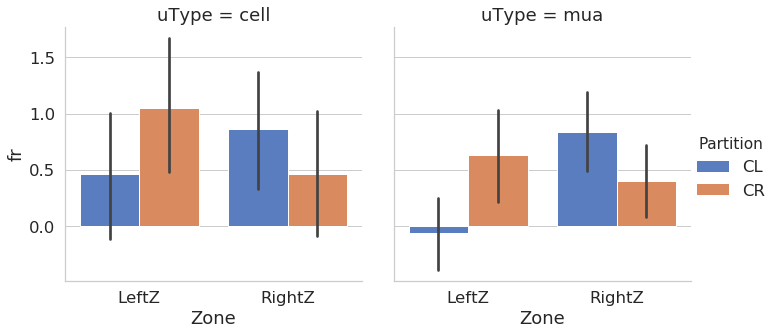

In [16]:
#f,ax = plt.subplots(figsize=(10,6))
#dat2 = FRZoneInfo.loc[FRZoneInfo['halfCorr']>0.5]
#dat = dat2
dat = FRZoneInfo
sns.set_style("whitegrid")
f=sns.catplot(x='Zone',y='fr',hue='Partition',data=dat,palette="muted",kind='bar',col='uType')
ax.grid()
sns.despine(offset=10, trim=False,ax=ax)
ax.grid(axis='both',color='grey',alpha=0.4)
ax.set_ylabel(' FR ')
ax.set_xlabel(' Zones ')
#f.savefig(plotSP / 'all_units_FRZoneNoGoalsAvgByCue.pdf', bbox_inches='tight',pad_inches=0.2)
#f.savefig(plotSP / 'all_units_FRZoneGoalsAvgByCue.pdf', bbox_inches='tight',pad_inches=0.2)

In [34]:
a=dat['fr'][ (dat['Zone']=='RightZ') & (dat['Partition']=='CL')]
b=dat['fr'][ (dat['Zone']=='RightZ') & (dat['Partition']=='CR')]

stats.ttest_rel(a,b)

Ttest_relResult(statistic=5.708093514145943, pvalue=2.0357652975349238e-08)

Text(0.5, 0, ' Zones ')

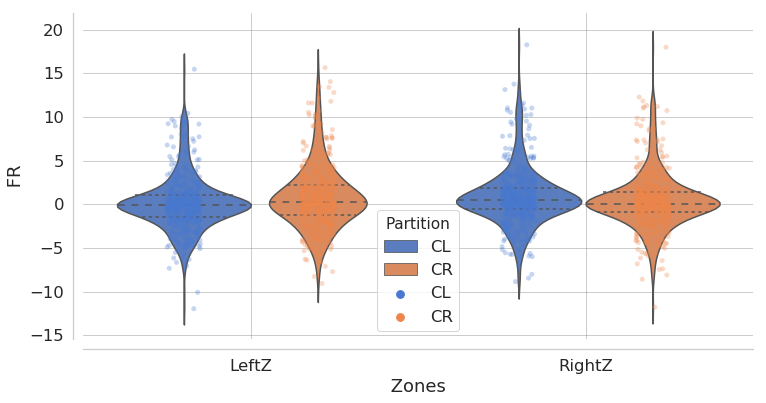

In [22]:
f,ax = plt.subplots(figsize=(12,6))
#dat2 = FRZoneInfo.loc[FRZoneInfo['halfCorr']>0.5]
#dat = dat2
dat = FRZoneInfo
sns.set_style("whitegrid")
sns.stripplot(x='Zone',y='fr',hue='Partition',data=dat,palette="muted",ax=ax,dodge=True,alpha=0.3)
sns.violinplot(x='Zone',y='fr',hue='Partition',data=dat,palette="muted",ax=ax,dodge=True,inner="quart",scale_hue=True)
ax.grid()
sns.despine(offset=10, trim=False,ax=ax)
ax.grid(axis='both',color='grey',alpha=0.4)
ax.set_ylabel(' FR ')
ax.set_xlabel(' Zones ')
#f.savefig(plotSP / 'all_units_FRZoneAvgByCye.pdf', bbox_inches='tight',pad_inches=0.2)

In [17]:

#dat2 = FRZoneInfo.loc[FRZoneInfo['halfCorr']>0.5]
dat2 = FRZoneInfo
md = smf.mixedlm("fr ~ 0+Partition*Zone+uType", data=dat2, groups=dat2["unitID"])
mdf = md.fit()
print(mdf.summary())
print("R2 = {0:.3f}".format((np.corrcoef(mdf.fittedvalues,dat2['fr'])**2)[0,1]))

NameError: name 'smf' is not defined

In [509]:
MaZones = ['LeftZ','CenterZ','RightZ']
nZ = 3
Parts = ['All','CO','CL','CO']
nP = 4

nReMe = nZ+nP

In [513]:
Parts*nZ*nSeUnits

['All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',

In [516]:
print(ZoneDat[se]['FR_Zone']['Cells'][0][CenterSegs].loc[Parts].T.mean().tolist())
print(ZoneDat[se]['FR_Zone']['Cells'][0][LeftSegs].loc[Parts].T.mean())
print(ZoneDat[se]['FR_Zone']['Cells'][0][RighSegs].loc[Parts].T.mean())

[25.357902738417852, 26.106310093124154, 24.75924888620811, 26.106310093124154]
All    29.894047
CO     30.263968
CL     30.300783
CO     30.263968
dtype: float64
All    30.388325
CO     30.369983
CL     32.934814
CO     30.369983
dtype: float64


In [650]:

#LeftZ = ['SegE','I2','SegF','G3','SegG','G4']
LeftZ = ['G3','G4']

CenterZ = ['Home','SegA','Center']
#RightZ = ['SegB','I1','SegB','G1','SegC','G2']
RightZ = ['G1','G2']


MaZones = ['LeftZ','RightZ']
nZ = len(MaZones)
Parts = ['CL','CR']
nP = len(Parts)

nReMe = nZ*nP

seCnt =0
unitCnt = 0

uTypeV = []
halfCorrV =[]
unitIDV = []

zoneV =[]
partV = []
frV = []
for se in SessionList:

    nSeCells = len(ZoneDat[se]['unitIDs']['cells'])
    nSeMua = len(ZoneDat[se]['unitIDs']['muas'])
    nSeUnits = nSeCells+nSeMua

    uTypeV+=['cell']*nSeCells*nReMe
    uTypeV+=['mua']*nSeMua*nReMe
    unitIDV+= (np.repeat(np.arange(nReMe),nSeUnits)+unitCnt).tolist()
    partV+=Parts*nZ*nSeUnits
    zoneV+=np.repeat(MaZones,nP).tolist()*nSeUnits
    
    halfCorrV+=np.repeat(ZoneDat[se]['ZoneStability']['Cells']['HalfCorr'],nReMe).tolist()
    halfCorrV+=np.repeat(ZoneDat[se]['ZoneStability']['Mua']['HalfCorr'],nReMe).tolist()
    
    for c in np.arange(nSeCells):
        frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][LeftZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c].loc['All'].mean()).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][CenterZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c].loc['All'].mean()).T.mean().tolist()
        frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][RightZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c].loc['All'].mean()).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][LeftZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c][LeftZ].loc['All']).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][CenterZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c][CenterZ].loc['All']).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][RightZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c][RightZ].loc['All']).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][LeftZ].loc[Parts]).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][RightZ].loc[Parts]).T.mean().tolist()
    for c in np.arange(nSeMua):
        frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][LeftZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Mua'][c].loc['All'].mean()).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][CenterZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c].loc['All'].mean()).T.mean().tolist()
        frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][RightZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Mua'][c].loc['All'].mean()).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][LeftZ].loc[Parts]).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][RightZ].loc[Parts]).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][LeftZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Mua'][c][LeftZ].loc['All']).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][CenterZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Mua'][c][CenterZ].loc['All']).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][RightZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Mua'][c][RightZ].loc['All']).T.mean().tolist()
        
    seCnt+=1
    unitCnt+=nSeUnits
    cellCnt+=nSeCells
    muaCnt+=nSeMua

FRZoneInfoFields = ['fr','uType','unitID','halfCorr','Partition','Zone']
FRZoneInfo=pd.DataFrame(np.zeros((0,len(FRZoneInfoFields))))
FRZoneInfo.columns=FRZoneInfoFields

FRZoneInfo['fr'] =frV
FRZoneInfo['uType'] = uTypeV
FRZoneInfo['unitID'] = unitIDV
FRZoneInfo['halfCorr'] = halfCorrV
FRZoneInfo['Partition'] = partV
FRZoneInfo['Zone'] = zoneV


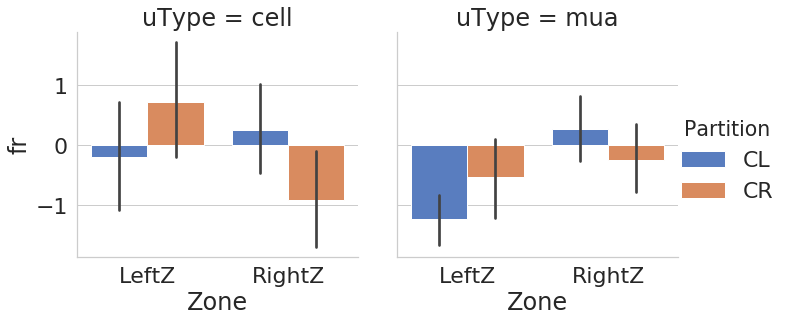

In [651]:
#f,ax = plt.subplots(figsize=(10,6))
#dat2 = FRZoneInfo.loc[FRZoneInfo['halfCorr']>0.5]
#dat = dat2
dat = FRZoneInfo
sns.set_style("whitegrid")
f=sns.catplot(x='Zone',y='fr',hue='Partition',data=dat,palette="muted",kind='bar',col='uType')
ax.grid()
sns.despine(offset=10, trim=False,ax=ax)
ax.grid(axis='both',color='grey',alpha=0.4)
ax.set_ylabel(' FR ')
ax.set_xlabel(' Zones ')
f.savefig(plotSP / 'all_units_FR_GoalsAvgByCue.pdf', bbox_inches='tight',pad_inches=0.2)

In [ ]:
FR_MajorZones = pd.DataFrame(np.zeros((0,len(Parts))))
UnitInfo.columns=UnitInfoFields

seCnt =0
unitCnt = 0
cellCnt=0
muaCnt=0
seV = []
seNumV = []

uTypeV = []
siV =[]
halfCorrV =[]
halfnRMSEV = []
zcV =[]

pairsV=[]
unitIDV = []
for se in SessionList:
    
    CellCorr = ZoneDat[se]['FR_CorrZonePairs']['Cells']
    nSeCells = CellCorr.shape[0]
    MuaCorr = ZoneDat[se]['FR_CorrZonePairs']['Mua']
    nSeMua = MuaCorr.shape[0]
    nSeUnits = nSeCells+nSeMua

    seV+=[se]*nSeUnits
    seNumV+=[seCnt]*nSeUnits
    
    uTypeV+=['cell']*nSeCells
    uTypeV+=['mua']*nSeMua
    
    unitIDV+= (np.arange(nSeUnits)+unitCnt).tolist()
    halfCorrV+=ZoneDat[se]['ZoneStability']['Cells']['HalfCorr'].tolist()
    halfCorrV+=ZoneDat[se]['ZoneStability']['Mua']['HalfCorr'].tolist()
    
    halfnRMSEV+=ZoneDat[se]['ZoneStability']['Cells']['HalfnRMSE'].tolist()
    halfnRMSEV+=ZoneDat[se]['ZoneStability']['Mua']['HalfnRMSE'].tolist()
    
    siV+=(ZoneDat[se]['SI_Zone']['Cells']['All'].tolist())
    siV+=(ZoneDat[se]['SI_Zone']['Mua']['All'].tolist())
    
    ZoneDat[se]['FR_Zone']['Cells'][0][CenterSegs].loc[Parts].T.mean()
    ZoneDat[se]['FR_Zone']['Cells'][0][LeftSegs].loc[Parts].T.mean()
    ZoneDat[se]['FR_Zone']['Cells'][0][RighSegs].loc[Parts].T.mean()
    
    seCnt+=1
    unitCnt+=nSeUnits
    cellCnt+=nSeCells
    muaCnt+=nSeMua


In [503]:
np.arange(nSeUnits)+10

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35])